In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [4]:
diabetes_data = pd.read_csv("../data/diabetes.csv")
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Побудувати графік розподілу випадкової змінної для кожної з чисельних ознак.

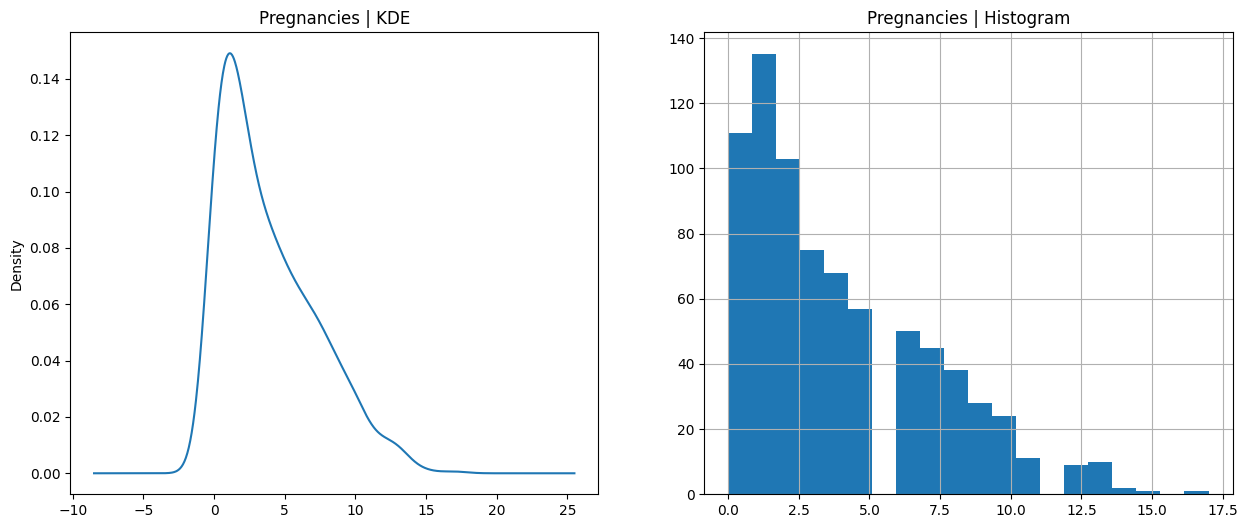

In [80]:
# Pregnancies
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data["Pregnancies"].plot(kind="kde", ax=axes[0])
axes[0].set_title("Pregnancies | KDE")

diabetes_data["Pregnancies"].hist(bins=20, ax=axes[1])
axes[1].set_title("Pregnancies | Histogram")

plt.show()
# Висновок:
# Спочатку подумав, що схоже на експоненту.
# Але, погравшись з відображеннями, на гістаграмі наче чітко бачу LogNormal

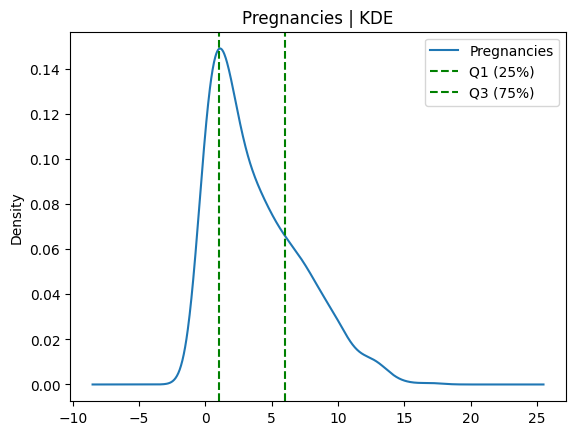

In [81]:
# Pregnancies

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["Pregnancies"].quantile(0.25)
q3 = diabetes_data["Pregnancies"].quantile(0.75)
ax = diabetes_data["Pregnancies"].plot(kind="kde", title="Pregnancies | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Короткий і різкий зліва, більший і пологий зправа.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, зсунутий вправо відносно піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Візуально схожий на LogNormal

In [82]:
# Pregnancies
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data["Pregnancies"])

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.90 не дуже близько до нормалі, відповідно  p<= 0.05, тож нормальність відхиляємо

(np.float64(0.9042812714701655), np.float64(1.6092572358874225e-21), np.False_)

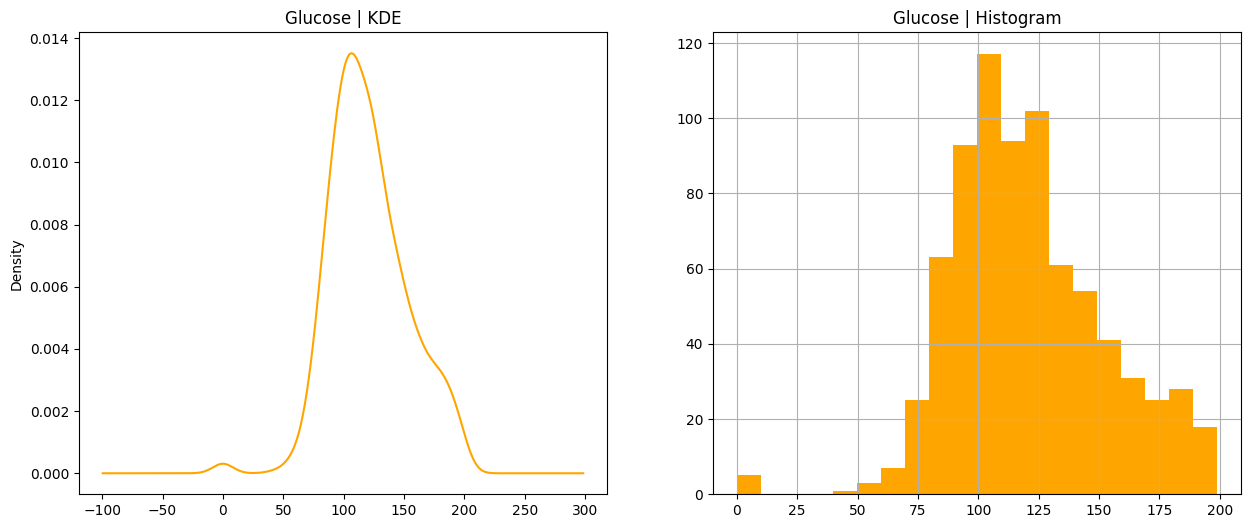

In [83]:
# Glucose
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data["Glucose"].plot(kind="kde", ax=axes[0], color="orange")
axes[0].set_title("Glucose | KDE")

diabetes_data["Glucose"].hist(bins=20, ax=axes[1], color="orange")
axes[1].set_title("Glucose | Histogram")

plt.show()
# Висновок:
# Тут більше проглядається Gamma, до ормального розподілу певно ще не дотягує

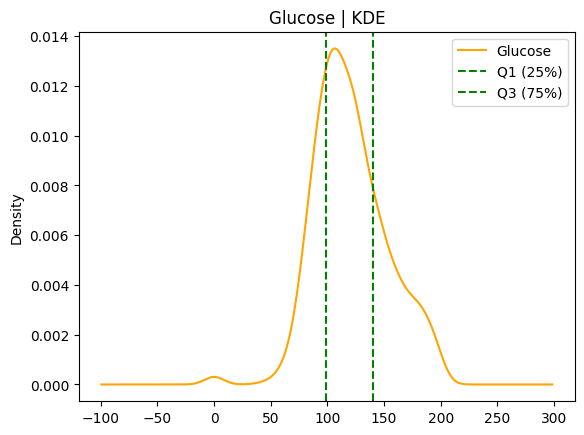

In [84]:
# Glucose

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["Glucose"].quantile(0.25)
q3 = diabetes_data["Glucose"].quantile(0.75)
ax = diabetes_data["Glucose"].plot(kind="kde", color="orange", title="Glucose | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Короткий і різкий зліва, також присутня аномалія в районі нуля, більший і пологий зправа.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, зсунутий вправо відносно піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Схожий на попередній, але більше проглядається Gamma

In [85]:
# Glucose
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data["Glucose"])

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.97 що дуже близько до нормалі, проте  p<= 0.05 тож нормальність відхиляємо

(np.float64(0.9701038379391942), np.float64(1.9863474999979633e-11), np.False_)

Text(0.5, 1.0, 'BloodPressure | Histogram')

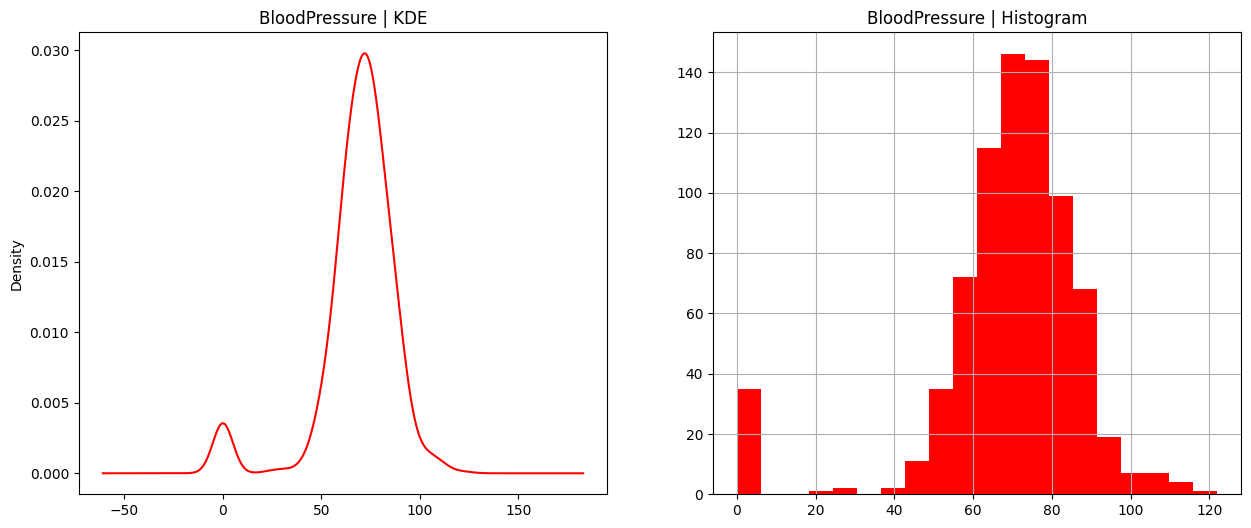

In [86]:
# BloodPressure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data["BloodPressure"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("BloodPressure | KDE")

diabetes_data["BloodPressure"].hist(bins=20, ax=axes[1], color="red")
axes[1].set_title("BloodPressure | Histogram")

# Висновок:
# Кровʼяний тиск в районі нуля то зовсім вже біда.
# Тож я схильний ввважати що тут ми маємо нормальний розподіл і аномальні занчення, які є сенс фільтрувати оскільки
# вони неправдоподібні.

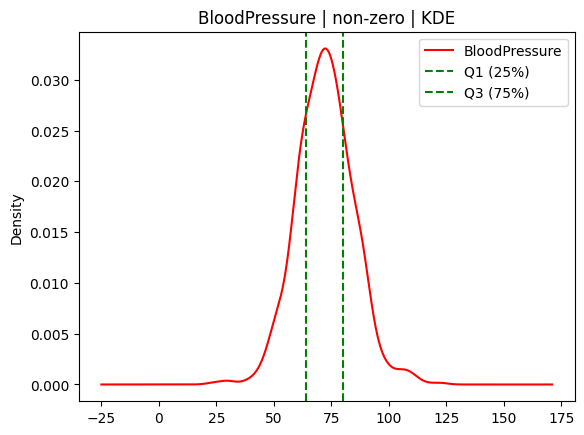

In [87]:
# BloodPressure

# Побудувати вертикальні лінії IQR для кожного графіку.
non_zero_bp = diabetes_data.loc[diabetes_data["BloodPressure"] != 0, "BloodPressure"]
q1 = non_zero_bp.quantile(0.25)
q3 = non_zero_bp.quantile(0.75)
ax = non_zero_bp.plot(kind="kde", color="red", title="BloodPressure | non-zero | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Хвости досить короткі, правий трохи довший - маємо невичку асиметрію.

# Розмір IQR відносно решти розподілу
# - Вузький, охоплює по суті лише основну масу в районі піку

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Дуже схожий на нормальний, але маємо певні погрішності з правого боку

In [88]:
# BloodPressure
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(non_zero_bp)

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.97 що дуже близько до нормалі, проте  p<= 0.05 тож нормальність відхиляємо

(np.float64(0.990314515469343), np.float64(9.451377169640385e-05), np.False_)

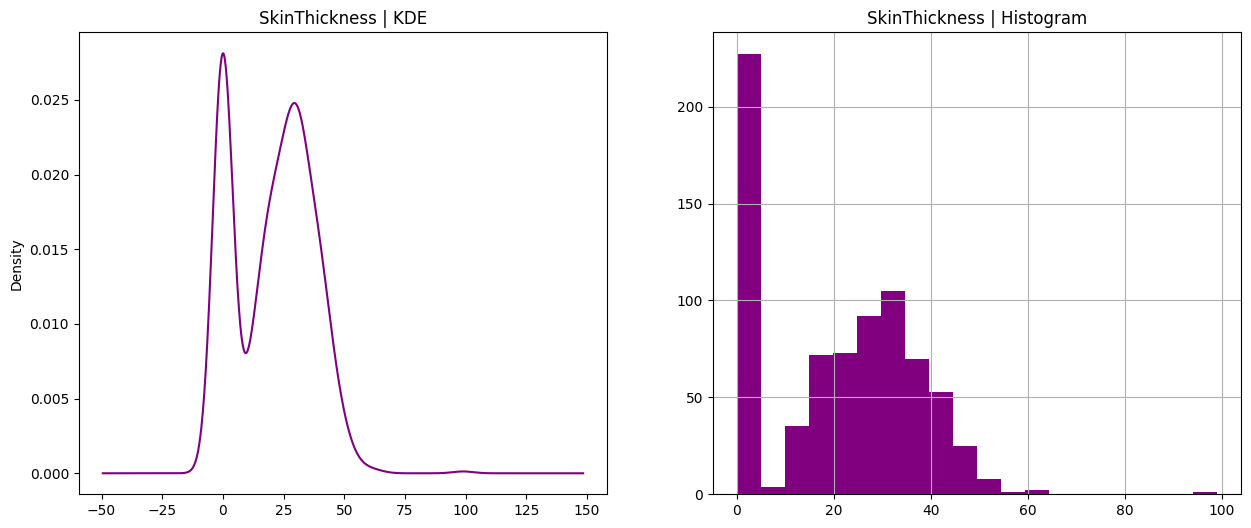

In [89]:
# SkinThickness
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data["SkinThickness"].plot(kind="kde", ax=axes[0], color="purple")
axes[0].set_title("SkinThickness | KDE")

diabetes_data["SkinThickness"].hist(bins=20, ax=axes[1], color="purple")
axes[1].set_title("SkinThickness | Histogram")

plt.show()
# Висновок:
# Товщина шкіри нуль теж виглядає не надто переконливо.
# Як і в попередньому, тут ми маємо нормальний розподіл і аномальні занчення, які є сенс фільтруються.

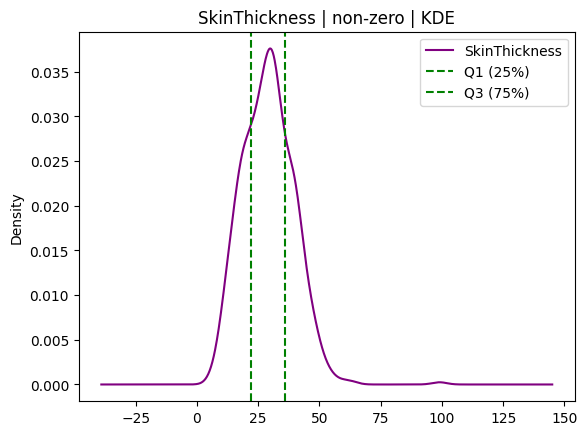

In [90]:
# SkinThickness

# Побудувати вертикальні лінії IQR для кожного графіку.
non_zero_st = diabetes_data.loc[diabetes_data["SkinThickness"] != 0, "SkinThickness"]
q1 = non_zero_st.quantile(0.25)
q3 = non_zero_st.quantile(0.75)
ax = non_zero_st.plot(
    kind="kde", color="purple", title="SkinThickness | non-zero | KDE"
)
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Хвости короткі, майже симетричні. Хоч пік і зміщений правіше.

# Розмір IQR відносно решти розподілу
# - Вузький, охоплює по суті лише основну масу в районі піку

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Дуже схожий на нормальний, але маємо ще якісь погрішності в районі 100, ну і пік не ідеально рівний

In [91]:
# SkinThickness
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(non_zero_st)

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.97 що дуже близько до нормалі, проте  p<= 0.05 тож нормальність відхиляємо

(np.float64(0.9679992373343264), np.float64(1.775690206383192e-09), np.False_)

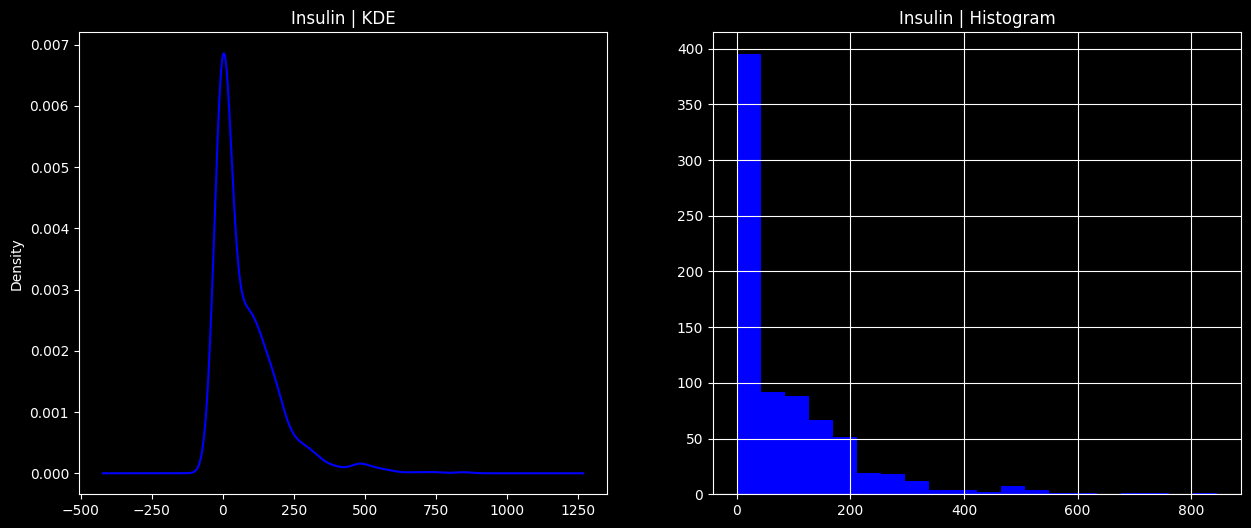

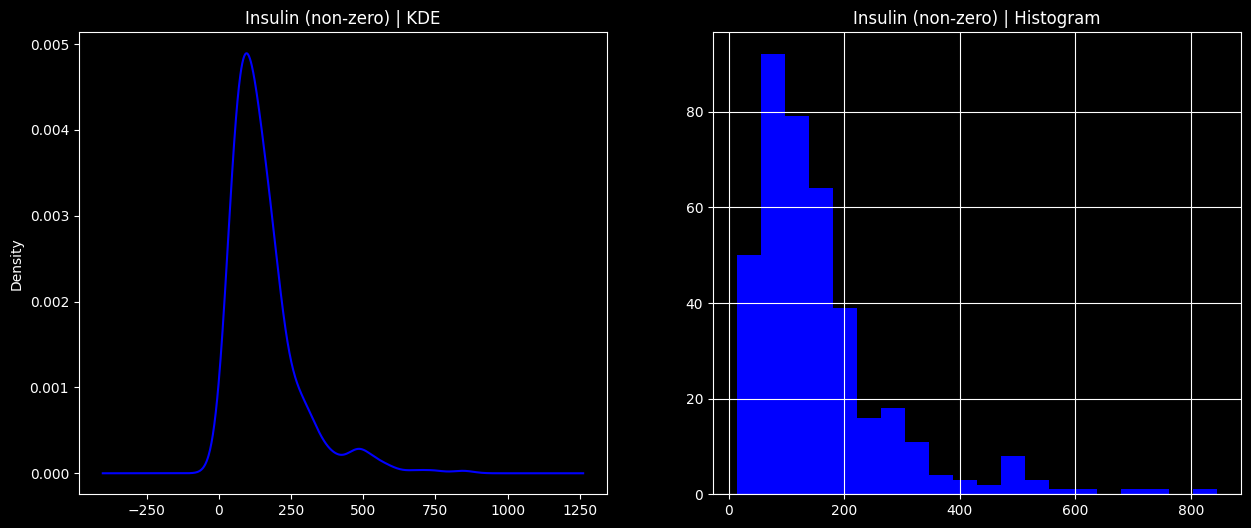

In [20]:
# Insulin

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
diabetes_data["Insulin"].plot(kind="kde", ax=axes[0], color="blue")
diabetes_data["Insulin"].hist(bins=20, ax=axes[1], color="blue")

axes[0].set_title("Insulin | KDE")
axes[1].set_title("Insulin | Histogram")

# Великий пік на нулі, тобто на пропущених значення, тому відфільтровуємо нулі щоб чіткіге побачити розподіл.
plt.show()

non_zero_insulin = diabetes_data.loc[diabetes_data["Insulin"] != 0, "Insulin"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
non_zero_insulin.plot(kind="kde", ax=axes[0], color="blue")
axes[0].set_title("Insulin (non-zero) | KDE")

non_zero_insulin.hist(bins=20, ax=axes[1], color="blue")
axes[1].set_title("Insulin (non-zero) | Histogram")

plt.show()
# Висновок:
# Після фільтрації нулів бачимо сильну правосторонню асиметрію.
# Чіткий пік зліва з довгим пологим хвостом вправо - схоже на LogNormal або Gamma

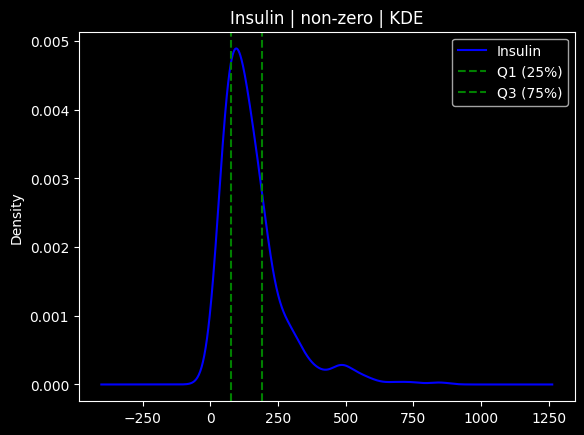

In [24]:
# Insulin

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = non_zero_insulin.quantile(0.25)
q3 = non_zero_insulin.quantile(0.75)
ax = non_zero_insulin.plot(kind="kde", color="blue", title="Insulin | non-zero | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Лівий хвіст дуже короткий і різкий, правий дуже довгий і пологий - сильна асиметрія.

# Розмір IQR відносно решти розподілу
# - Вузький, зміщений дуже сильно вліво, охоплює основну масу даних біля піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Зовсім не нормальний. Класичний LogNormal - сильна правостороння асиметрія

In [7]:
# Insulin
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(non_zero_insulin)

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.88 що далеко від нормалі, p<= 0.05 тож нормальність відхиляємо

(np.float64(0.8040996182702659), np.float64(1.6982183020696754e-21), np.False_)

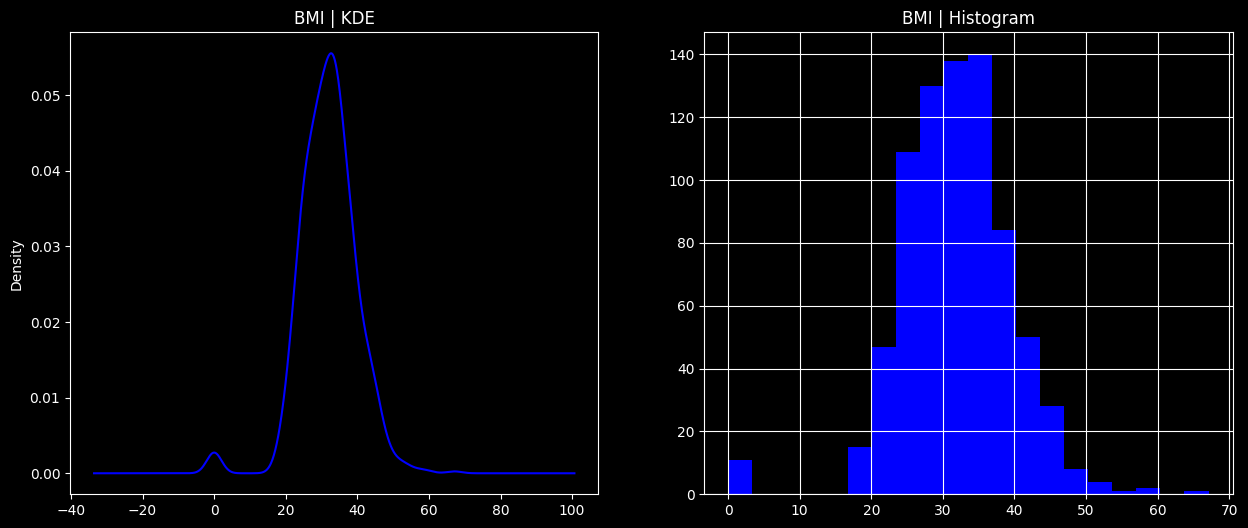

In [25]:
# BMI
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data["BMI"].plot(kind="kde", ax=axes[0], color="blue")
axes[0].set_title("BMI | KDE")

diabetes_data["BMI"].hist(bins=20, ax=axes[1], color="blue")
axes[1].set_title("BMI | Histogram")

plt.show()
# Висновок:
# Розподіл BMI досить симетричний, схожий на нормальний але з легкою правосторонньою асиметрією

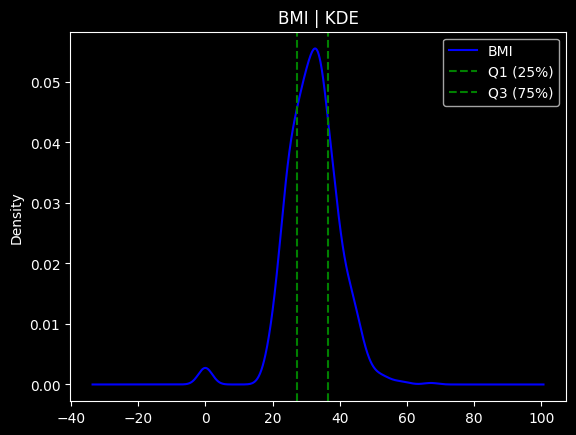

In [26]:
# BMI

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["BMI"].quantile(0.25)
q3 = diabetes_data["BMI"].quantile(0.75)
ax = diabetes_data["BMI"].plot(kind="kde", color="blue", title="BMI | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Обидва хвости помірної довжини, правий трохи довший - легка правостороння асиметрія.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, добре центрований відносно піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Дуже схожий на нормальний

In [11]:
# BMI
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data["BMI"])

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.98 що дуже близько до нормалі, проте p<= 0.05 тож нормальність відхиляємо

(np.float64(0.9499902687524108), np.float64(1.8416516138516335e-15), np.False_)

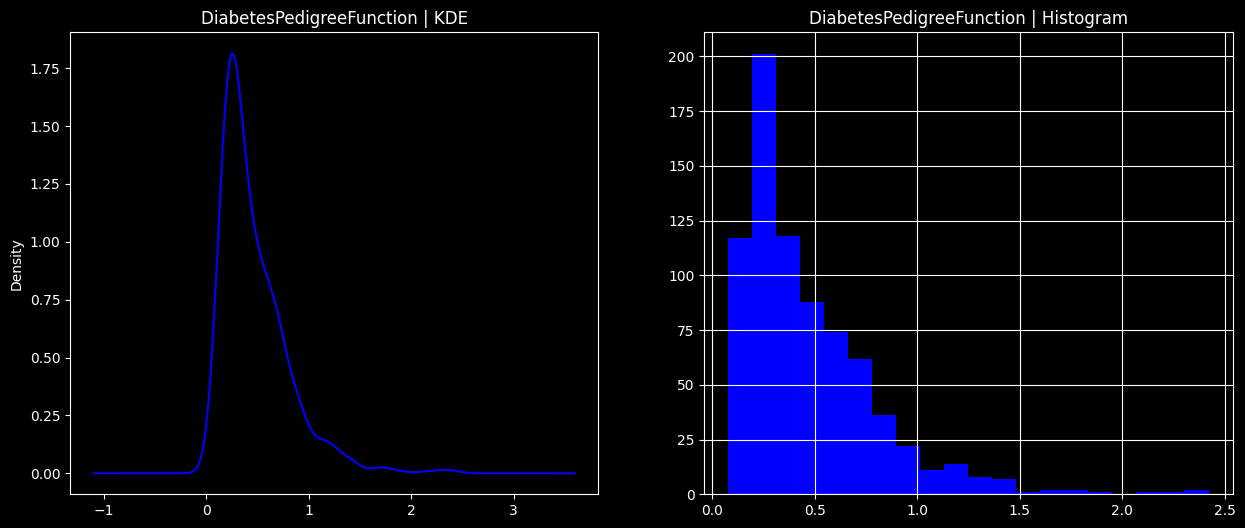

In [28]:
# DiabetesPedigreeFunction
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data["DiabetesPedigreeFunction"].plot(kind="kde", ax=axes[0], color="blue")
axes[0].set_title("DiabetesPedigreeFunction | KDE")

diabetes_data["DiabetesPedigreeFunction"].hist(bins=20, ax=axes[1], color="blue")
axes[1].set_title("DiabetesPedigreeFunction | Histogram")

plt.show()
# Висновок:
# сильна правостороння асиметрія, схоже на Exponential або Gamma

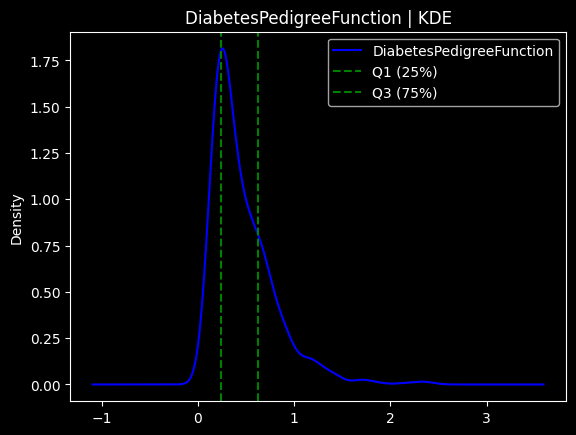

In [34]:
# DiabetesPedigreeFunction

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["DiabetesPedigreeFunction"].quantile(0.25)
q3 = diabetes_data["DiabetesPedigreeFunction"].quantile(0.75)
ax = diabetes_data["DiabetesPedigreeFunction"].plot(
    kind="kde", color="blue", title="DiabetesPedigreeFunction | KDE"
)
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Дуже короткий і різкий зліва, довгий і пологий зправа - асиметрія.

# Розмір IQR відносно решти розподілу
# - Вузький, зміщений вліво.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Зовсім не нормальний. Схоже на Exponential або Gamma розподіл

In [14]:
# DiabetesPedigreeFunction
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data["DiabetesPedigreeFunction"])

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.83 що далеко від нормалі, p<= 0.05 тож нормальність відхиляємо

(np.float64(0.8365181321396535), np.float64(2.477505530854268e-27), np.False_)

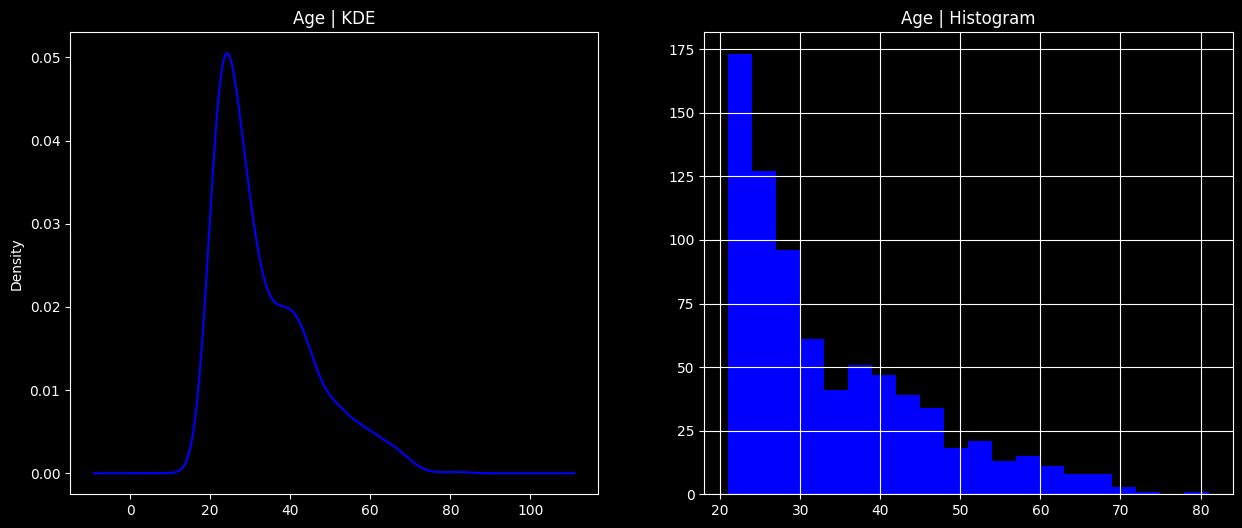

In [30]:
# Age
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data["Age"].plot(kind="kde", ax=axes[0], color="blue")
axes[0].set_title("Age | KDE")

diabetes_data["Age"].hist(bins=20, ax=axes[1], color="blue")
axes[1].set_title("Age | Histogram")

plt.show()
# Висновок:
# Правостороння асиметрія, багато молодих людей, менше старших - схоже на LogNormal

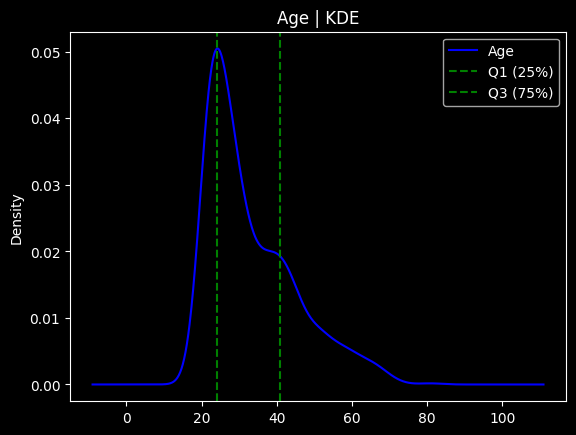

In [32]:
# Age

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["Age"].quantile(0.25)
q3 = diabetes_data["Age"].quantile(0.75)
ax = diabetes_data["Age"].plot(kind="kde", color="blue", title="Age | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Короткий і різкий зліва (мінімальний вік), довгий і пологий зправа.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, зміщений вліво, більшість молодих людей.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Правостороння асиметрія, схоже на LogNormal

In [29]:
# Age
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data["Age"])

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.89 що не дуже близько до нормалі, p<= 0.05 тож нормальність відхиляємо

(np.float64(0.8747668643940426), np.float64(2.4022741290400888e-24), np.False_)